In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

print "Reading reviews"
reviews = pd.read_csv("train_app_review.csv");
%matplotlib inline
downloads = pd.read_csv("train_final_downloads.csv");
downloads = downloads.set_index('id');

Reading reviews


The cumulative sum of stars an app has plotted against the number of downloads. Quite a bit of noise here just from the huge number of apps.
TODO: find out where the missing 4000 apps went. Probably due to them disappearing from not having any reviews. Need to fill in.

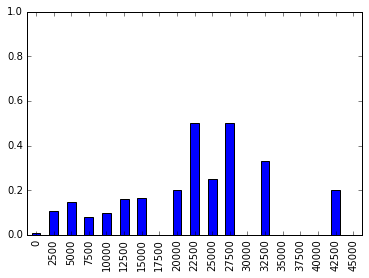

In [3]:
result_downloads = downloads.join(reviews.groupby('id').agg('sum'));
top_one = result_downloads.sort_values('cumulative_downloads_2016-02', ascending=False).iloc[:300]
totals = pd.cut(result_downloads['rating'],np.arange(0,50000,2500), labels=np.arange(0,47500,2500)).value_counts()
success = pd.cut(top_one['rating'],np.arange(0,50000,2500), labels=np.arange(0,47500,2500)).value_counts()
relative_success_df = pd.DataFrame({'percent':success/totals, 'success':success, 'total':totals})
relative_success_df
rel_plot = relative_success_df['percent'].plot(kind='bar')
rel_plot.set_ylim([0,1]);

By normalizing the reviews (-2 to 2 rather than 1 to 5), we start to get more predictable results as to how strong of an indicator 

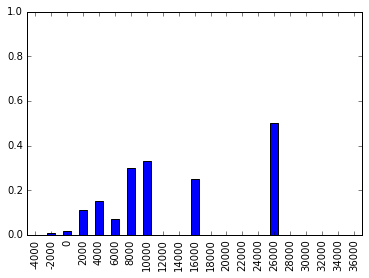

In [4]:
normalized_reviews = reviews.copy();
normalized_reviews['rating'] = normalized_reviews['rating'] - 3
normalized_downloads = downloads.sort_values('cumulative_downloads_2016-02', ascending=False).join(normalized_reviews.groupby('id').agg('sum'));
normalized_downloads
normalized_top_one = normalized_downloads.sort_values('cumulative_downloads_2016-02', ascending=False).iloc[:300]
normalized_totals = pd.cut(normalized_downloads['rating'],np.arange(-4000,40000,2000), labels=np.arange(-4000,38000,2000)).value_counts()
normalized_success = pd.cut(normalized_top_one['rating'],np.arange(-4000,40000,2000), labels=np.arange(-4000,38000,2000)).value_counts()
normalized_success_df = pd.DataFrame({'percent':normalized_success/normalized_totals, 'success':normalized_success, 'total':normalized_totals})
norm_plot = normalized_success_df['percent'].plot(kind='bar')
norm_plot.set_ylim([0,1]);

In [253]:
normalized_success_df

,percent,success,total
-4000,0.000000,0,3
-2000,0.008202,72,8778
0,0.015437,185,11984
2000,0.110390,17,154
4000,0.153846,8,52
6000,0.071429,2,28
8000,0.300000,3,10
10000,0.333333,3,9
12000,0.000000,0,2
14000,0.000000,0,5


(-4000, 40000)

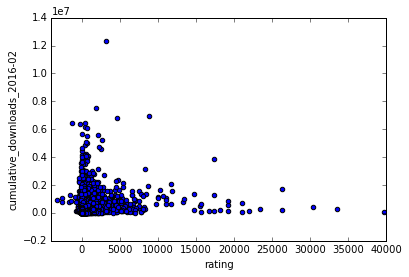

In [8]:
norm_scattered = normalized_downloads.plot(kind='scatter',x='rating',y='cumulative_downloads_2016-02')
norm_scattered.set_xlim([-4000,40000])

We can infer the number of different versions an app has released by counting the set of versions that have been reviewed. This is a proxy for the number of releases that an app has had during its time in these months. I suspect the correlation is strong because of two reasons: developers who maintain and release more often are able to address users' concerns and the correlation that an unpopular app may only be reviewed few times (or even never) for the same version so they will appear to have a lower number of versions when in reality they could have released multiple in between that were just never reviewed.

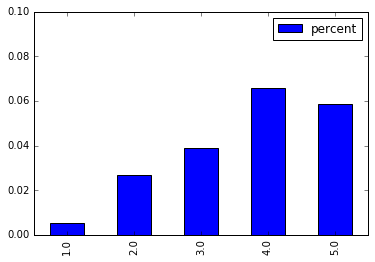

In [5]:
normalized_downloads2=normalized_downloads.join(normalized_reviews.groupby('id').version.nunique())
#normalized_downloads2[['version','cumulative_downloads_2016-02']].dropna().plot(kind='scatter',x='version',y = 'cumulative_downloads_2016-02')
version_totals = normalized_downloads2['version'].value_counts()
top_percent_totals = normalized_downloads2[normalized_downloads2['cumulative_downloads_2016-02'] > 1500000]['version'].value_counts()
#version_totals
percent_totals = pd.DataFrame({'totals':version_totals,'top_one':top_percent_totals, 'percent':top_percent_totals/version_totals})
percent_plot = percent_totals[0:5].plot(kind='bar',y='percent')
percent_plot.set_ylim([0,.1]);